## Assignment 02

## Task 01

In [113]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [175]:
from PIL import Image

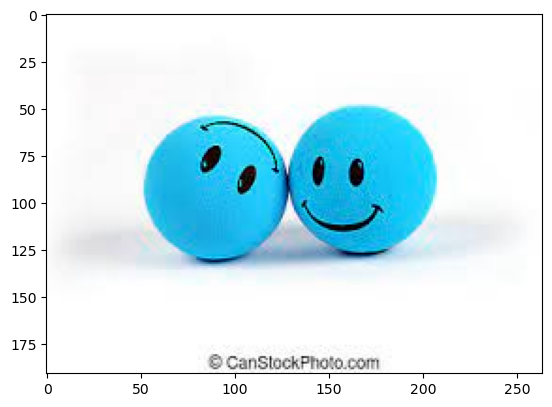

In [114]:
img=cv2.imread("C:/Users/Lenovo/OneDrive/Documents/Computer vision/Assignment_2/download.jpg")
plt.imshow(img)
plt.show()

In [277]:
img2 = cv2.imread("C:/Users/Lenovo/OneDrive/Documents/Computer vision/Assignment_2/download.jpg")

## gausian with otsu

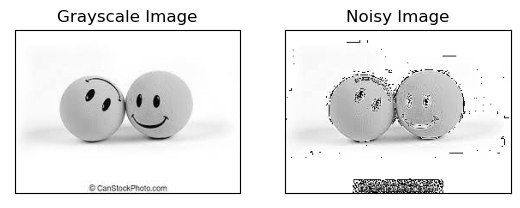

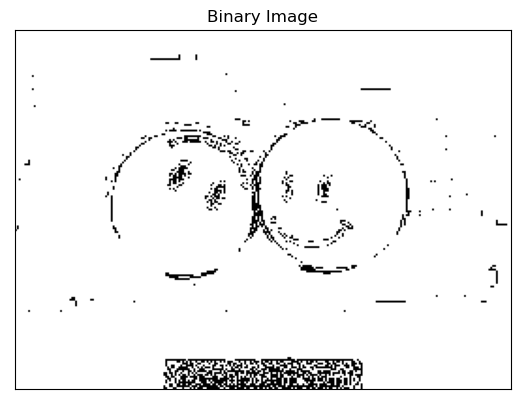

In [278]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = img2
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Add Gaussian noise to the image
gauss = cv2.GaussianBlur(gray, (5, 5), 0)
noise = gray - gauss
noisy_img = gray + noise

# Display the original and noisy images
plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Apply Otsu's algorithm
_, thresh = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
plt.imshow(thresh, cmap='gray')
plt.title('Binary Image'), plt.xticks([]), plt.yticks([])
plt.show()



## Task 2

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("C:/Users/Lenovo/OneDrive/Documents/Computer vision/Assignment_2/WhatsApp Image 2023-03-17 at 5.36.46 PM.jpeg")

# Define the seeds as a list of points
seeds = [(100, 100)]#, (200, 200), (300, 300)]

# Define the range of pixel values for region growing
range_threshold = 50

# Define the mask to keep track of which pixels have been added to the region
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Define the region-growing function
def region_grow(seed, img, mask, range_threshold):
    # Get the pixel value of the seed point
    seed_value = img[seed[0], seed[1]]

    # Initialize a list of pixels to check for region growing
    pixels_to_check = [seed]

    # Loop over the pixels to check
    while len(pixels_to_check) > 0:
        # Get the next pixel to check
        current_pixel = pixels_to_check.pop()

        # Check if the pixel is within the range threshold of the seed value
        if all(abs(img[current_pixel[0], current_pixel[1]] - seed_value) < range_threshold):
            # Add the pixel to the mask and mark it as checked
            mask[current_pixel[0], current_pixel[1]] = 255

            # Get the neighboring pixels
            neighbors = [(current_pixel[0]-1, current_pixel[1]-1),
                         (current_pixel[0]-1, current_pixel[1]),
                         (current_pixel[0]-1, current_pixel[1]+1),
                         (current_pixel[0], current_pixel[1]-1),
                         (current_pixel[0], current_pixel[1]+1),
                         (current_pixel[0]+1, current_pixel[1]-1),
                         (current_pixel[0]+1, current_pixel[1]),
                         (current_pixel[0]+1, current_pixel[1]+1)]

            # Loop over the neighboring pixels
            for neighbor in neighbors:
                # Check if the neighbor is within the image boundaries and has not been checked yet
                if (neighbor[0] >= 0 and neighbor[0] < img.shape[0] and
                    neighbor[1] >= 0 and neighbor[1] < img.shape[1] and
                    mask[neighbor[0], neighbor[1]] == 0):
                    # Add the neighbor to the list of pixels to check
                    pixels_to_check.append(neighbor)

# Loop over the seeds and perform region growing
for seed in seeds:
    region_grow(seed, img, mask, range_threshold)

# Display the original image and the segmented image
cv2.imshow('Original Image', img)
cv2.imshow('Segmented Image', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
